In [2]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Additional questions for Lab 5

I added these questions here, but feel free to add them to the notebook of Lab 5 if you prefer. Don't worry, tese questions are part of Lab 6 and will be due when Lab 6 is due. 

**Plot the ROC curve of your model. What is the AUC? Does it seem reasonable?**

(712, 7) (179, 7)
(712,) (179,)


Text(0.5, 1.0, 'ROC curve')

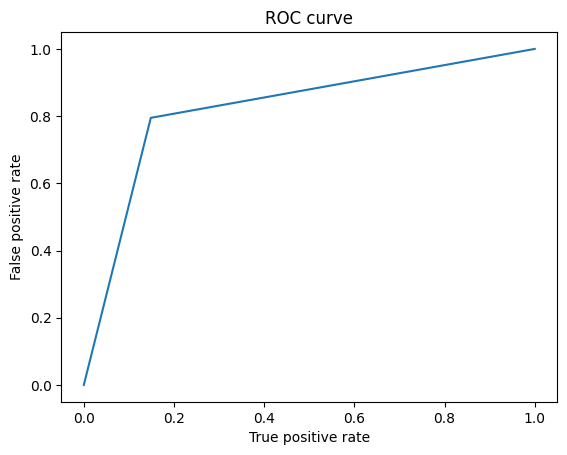

In [3]:
from sklearn.model_selection import train_test_split
df = pd.read_csv('titanic/train.csv')
df['Embarked'].fillna(value='S', inplace=True)
df['Fare'].fillna(value=df.Fare.mean(), inplace=True)
df['Age'] = df['Age'].fillna((df['Age'].median()))
df = df.replace({'male': 1, 'female': 0,'S': 0, 'Q': 1,'C':2})
df = df.drop(['Name','Ticket','PassengerId','Cabin'], axis=1)
test_data = df['Survived']
train_data = df.drop('Survived', axis=1)
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(train_data, test_data, test_size=0.2)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

clf = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)

clf.score(X_test,y_test)
clf.predict(X_test)
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, clf.predict(X_test))
plt.plot(fpr,tpr)
plt.xlabel('True positive rate')
plt.ylabel('False positive rate')
plt.title('ROC curve')

**Practical use case**: I am the CEO of the White Star Line, the company operating the Titanic.

I have just learned there has been on accident on our new cruise ship, the Titanic 2. The ship was an exact replica of the Titanic, and seem to have sunk under the exact same circumstances -- we do not really learn from our mistakes at White Star Line. We can assume the passengers followed the exact same distribution as the passengers from the Titanic, and behaved in the exact same way.

I do not yet know which passenger survived and which one died. However, I would like to start calling families of the (likely) deceased to try to avoid a lawsuit. I plan to use your model for this. I want to make sure that at least 80% of the families I call have lost a loved one during the accident, as otherwise this could lead to embarassing situations.

What percentage of deceased passenger's families will I be able to call?

For the sake of simplicity, you can consider that each passenger has a different family so that I will not call the same family twice (even though some passengers are siblings, parents etc).

In [21]:
threshold = 0.8
predicted_proba = clf.predict_proba(X_test)
predicted = (predicted_proba[:,0] >= threshold)
np.sum(predicted) #gives the estimated number of people who died
percentage_lost_a_loved_one = np.sum(predicted)/len(predicted)
print('percentage_lost_a_loved_one:',percentage_lost_a_loved_one*100,'%')


percentage_lost_a_loved_one: 39.10614525139665 %


this number is very low because it only consider passanger that the model really expect to die because the threshold is high

# Expectation maximization for mixtures of gaussians

We will use the Iris dataset f(from Lab 3) again.

In [5]:
from sklearn import datasets
iris_dataset = datasets.load_iris()

In [6]:
X_iris, y_iris = iris_dataset.data, iris_dataset.target
print(X_iris.shape, y_iris.shape)

(150, 4) (150,)


In [7]:
from matplotlib.colors import ListedColormap
colormap = ListedColormap(['blue', 'red', 'green'])

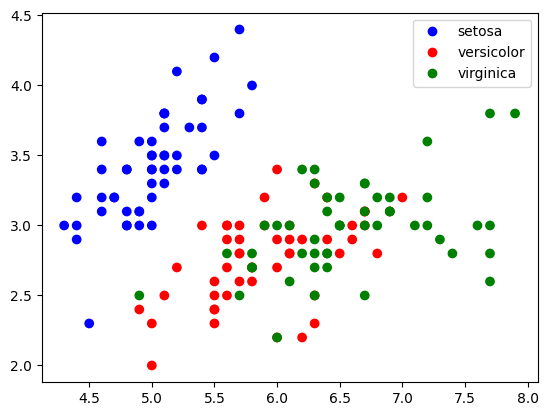

In [8]:
scatter = plt.scatter(X_iris[:,0], X_iris[:,1], c=y_iris, cmap=colormap)
plt.legend(scatter.legend_elements()[0], iris_dataset.target_names)
plt.show()


**Model the distribution of the points as a mixture of gaussians. What are the means of each cluster? What are the covariance matrices?**

In [9]:
from sklearn.mixture import GaussianMixture
GM = GaussianMixture(n_components=3, random_state=0, covariance_type='diag').fit(X_iris)
print('the mean of each clusters are: ', GM.means_)
print('the covariances of each clusters are: ', GM.covariances_)

the mean of each clusters are:  [[5.006      3.428      1.462      0.246     ]
 [6.8060823  3.07023103 5.71889409 2.10305305]
 [5.92570673 2.74947486 4.40355614 1.41204165]]
the covariances of each clusters are:  [[0.121765   0.140817   0.029557   0.010885  ]
 [0.28520059 0.08200975 0.25128562 0.06109484]
 [0.23145596 0.08738014 0.27563102 0.0688713 ]]


**Sample some new points from this distribution. Plot the first two dimensions of these new points as a scatter plot similarly to the figure above.**

Use three colors. It doesn't matter if the color are not the same.

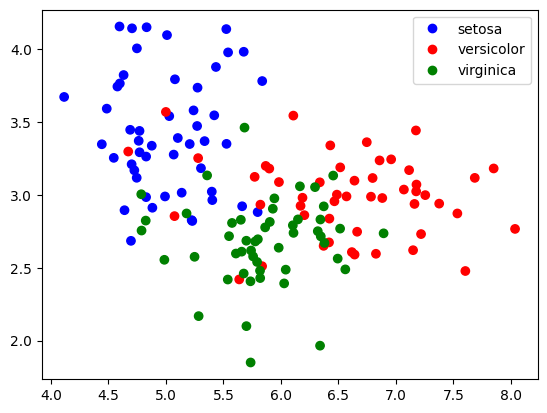

In [18]:
new_points_x, new_points_y = GM.sample(150)
scatter = plt.scatter(new_points_x[:,0], new_points_x[:,1], c=y_iris, cmap=colormap)
plt.legend(scatter.legend_elements()[0], iris_dataset.target_names)
plt.show()

The new points sampled clusters are similar that the orignal dataset. But they are more eparsed. 